Ссылка на презентацию:  https://drive.google.com/file/d/1Zyu-ObR9hId-LK5vlsVHimhDviSGwGhb/view?usp=sharing        

Сылка на Dashboard: https://public.tableau.com/app/profile/kleoshkin.valerii/viz/final_project_16533981301190/Dashboard1?publish=yes

# Ритейл — Анализ программы лояльности

*Задача:*

Проанализируйте программу лояльности магазина.

- Проведите исследовательский анализ данных;
- Проведите анализ программы лояльности;
- Сформулируйте и проверьте статистические гипотезы.

*Описание данных:*

Датасет содержит данные о покупках в магазине строительных материалов «Строили, строили и наконец построили». Все покупатели могут получить доступ в магазин с использованием персональных карт. За 200 рублей в месяц они могут стать участниками программы лояльности. В программу включены скидки, специальные предложения, подарки.

Файл retail_dataset.csv:

- `purchaseId` — id чека;
- `item_ID` — id товара;
- `purchasedate` — дата покупки;
- `Quantity` — количество товара;
- `CustomerID` — id покупателя;
- `ShopID` — id магазина;
- `loyalty_program` — участвует ли покупатель в программе лояльности;

Файл product_codes.csv:

- `productID` — id товара;
- `price_per_one` — стоимость одной единицы товара;

Загрузим библиотеки

In [1]:
import pandas as pd
from datetime import date
import matplotlib.pyplot as plt 


from scipy import stats as st
import math
import numpy as np
from numpy.random import randn

import seaborn as sns
import plotly.express as px
from plotly import graph_objects as go
import math as mth

import scipy.stats as stats
from scipy import stats as st

## Откроем файлы с данными product_codes .csv и retail_dataset .csv и изучите общую информацию.

In [2]:
retail = pd.read_csv('/datasets/retail_dataset.csv') #открываем файл retail_dataset.csv
display(retail.head())

,purchaseid,item_ID,Quantity,purchasedate,CustomerID,ShopID,loyalty_program
0,538280,21873,11,2016-12-10 12:50:00,18427.0,Shop 0,0.0
1,538862,22195,0,2016-12-14 14:11:00,22389.0,Shop 0,1.0
2,538855,21239,7,2016-12-14 13:50:00,22182.0,Shop 0,1.0
3,543543,22271,0,2017-02-09 15:33:00,23522.0,Shop 0,1.0
4,543812,79321,0,2017-02-13 14:40:00,23151.0,Shop 0,1.0


In [3]:
product = pd.read_csv('/datasets/product_codes.csv') #открываем файл product_codes.csv
display(product.head())

,productID,price_per_one
0,85123A,2.55
1,71053,3.39
2,84406B,2.75
3,84029G,3.39
4,84029E,3.39


##  Подготовим данные.

### Заменим названия столбцов для retail_dataset. Приведём  к нижнему регистру и "змеиному" виду.


In [4]:
#retail.columns = [x.lower().replace(' ', '_') for x in retail.columns.values]
retail.columns = ['purchase_id', 'item_id', 'quantity', 'purchase_date','customer_id', 'shop_id', 'loyalty_program']
display(retail.head())

,purchase_id,item_id,quantity,purchase_date,customer_id,shop_id,loyalty_program
0,538280,21873,11,2016-12-10 12:50:00,18427.0,Shop 0,0.0
1,538862,22195,0,2016-12-14 14:11:00,22389.0,Shop 0,1.0
2,538855,21239,7,2016-12-14 13:50:00,22182.0,Shop 0,1.0
3,543543,22271,0,2017-02-09 15:33:00,23522.0,Shop 0,1.0
4,543812,79321,0,2017-02-13 14:40:00,23151.0,Shop 0,1.0


### В таблице product_codes заменим название столбца productID на item_ID для единообразия и возможности дальнейшего объединения датасетов.

In [5]:
product.rename(columns={'productID': 'item_id'}, inplace=True)
display(product)

,item_id,price_per_one
0,85123A,2.55
1,71053,3.39
2,84406B,2.75
3,84029G,3.39
4,84029E,3.39
...,...,...
9964,84306,8.29
9965,90001A,4.15
9966,90118,2.46
9967,DOT,172.62


In [6]:
#product['item_id'].nunique()

### Проверим тип данных в датасетах. Преобразуйте данные в нужные типы .

In [7]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105335 entries, 0 to 105334
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   purchase_id      105335 non-null  object 
 1   item_id          105335 non-null  object 
 2   quantity         105335 non-null  int64  
 3   purchase_date    105335 non-null  object 
 4   customer_id      69125 non-null   float64
 5   shop_id          105335 non-null  object 
 6   loyalty_program  105335 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 5.6+ MB


In [8]:
product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9969 entries, 0 to 9968
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   item_id        9969 non-null   object 
 1   price_per_one  9969 non-null   float64
dtypes: float64(1), object(1)
memory usage: 155.9+ KB


In [9]:
retail['purchase_date'] = pd.to_datetime(retail['purchase_date'])
retail['date']=pd.to_datetime(retail['purchase_date'].dt.strftime('%Y-%m-%d'))

#Добавим столбец date усеченная до даты покупки(отбросим время покупки).

retail.info()
display(retail.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105335 entries, 0 to 105334
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   purchase_id      105335 non-null  object        
 1   item_id          105335 non-null  object        
 2   quantity         105335 non-null  int64         
 3   purchase_date    105335 non-null  datetime64[ns]
 4   customer_id      69125 non-null   float64       
 5   shop_id          105335 non-null  object        
 6   loyalty_program  105335 non-null  float64       
 7   date             105335 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(2), int64(1), object(3)
memory usage: 6.4+ MB


,purchase_id,item_id,quantity,purchase_date,customer_id,shop_id,loyalty_program,date
0,538280,21873,11,2016-12-10 12:50:00,18427.0,Shop 0,0.0,2016-12-10
1,538862,22195,0,2016-12-14 14:11:00,22389.0,Shop 0,1.0,2016-12-14
2,538855,21239,7,2016-12-14 13:50:00,22182.0,Shop 0,1.0,2016-12-14
3,543543,22271,0,2017-02-09 15:33:00,23522.0,Shop 0,1.0,2017-02-09
4,543812,79321,0,2017-02-13 14:40:00,23151.0,Shop 0,1.0,2017-02-13


Переведем значения столбца loyalty_program в целочисленный тип. 

In [10]:
retail['loyalty_program']=retail['loyalty_program'].astype('int64')
display(retail.head(5))

,purchase_id,item_id,quantity,purchase_date,customer_id,shop_id,loyalty_program,date
0,538280,21873,11,2016-12-10 12:50:00,18427.0,Shop 0,0,2016-12-10
1,538862,22195,0,2016-12-14 14:11:00,22389.0,Shop 0,1,2016-12-14
2,538855,21239,7,2016-12-14 13:50:00,22182.0,Shop 0,1,2016-12-14
3,543543,22271,0,2017-02-09 15:33:00,23522.0,Shop 0,1,2017-02-09
4,543812,79321,0,2017-02-13 14:40:00,23151.0,Shop 0,1,2017-02-13


### Проверим есть ли пропуски  и дубликаты. Подумаем, что с ними делать.


#### Проверим датасет retail_dataset

In [11]:
retail.duplicated().sum() #считаем дубликаты в датафрейме retail_dataset


1033

In [12]:
retail.isna().sum() #считаем пустые строки в датафрейме retail_dataset


purchase_id            0
item_id                0
quantity               0
purchase_date          0
customer_id        36210
shop_id                0
loyalty_program        0
date                   0
dtype: int64

**Вывод:** Дубликаты есть. Их небольшое количество, всего 0,98%. Есть смысл избавиться от них. Пропусков значений гораздо больше, но они есть только в одном столбце customer_id (id покупателя). Предположим, что это клиенты которые покупали товары через кассу и не пользуются программой лояльности. Если это так, то и  пропуски оставим как есть.

In [13]:
retail = retail.drop_duplicates().reset_index(drop=True)#удалим задублированные строки.
retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104302 entries, 0 to 104301
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   purchase_id      104302 non-null  object        
 1   item_id          104302 non-null  object        
 2   quantity         104302 non-null  int64         
 3   purchase_date    104302 non-null  datetime64[ns]
 4   customer_id      68154 non-null   float64       
 5   shop_id          104302 non-null  object        
 6   loyalty_program  104302 non-null  int64         
 7   date             104302 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(2), object(3)
memory usage: 6.4+ MB


In [14]:
#retail.duplicated().sum()

In [15]:
retail_null=retail[retail['loyalty_program']== 1]
retail_null.isna().sum()

purchase_id        0
item_id            0
quantity           0
purchase_date      0
customer_id        0
shop_id            0
loyalty_program    0
date               0
dtype: int64

Предположение подтвердилось. Пропуски в customer_id только для пользователей,которые не входят в  программу лояльности. Будем считать , что это клиенты которые покупают через кассу и удалять их не будем.

#### Проверим датасет product_codes.

In [16]:
product.duplicated().sum() #считаем дубликаты в датафрейме product_codes


0

In [17]:
product.isna().sum() #считаем пустые строки в датафрейме product_codes


item_id          0
price_per_one    0
dtype: int64

**Вывод:** Дубликатов и пропусков нет. Отлично.

### Заменим цены на товар в таблицу product_codes  на медианное значение.

In [18]:
product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9969 entries, 0 to 9968
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   item_id        9969 non-null   object 
 1   price_per_one  9969 non-null   float64
dtypes: float64(1), object(1)
memory usage: 155.9+ KB


In [19]:
product['item_id'].nunique()

3159

In [20]:
product_null = product[product['price_per_one']==0]
display(product_null.count())

item_id          382
price_per_one    382
dtype: int64

Видим, что уникальных товаров 3159 при этом 382 нулевых цен. Всего записей 9969, это значит у некоторых  товаров несколько цен. Это конечно вопрос к коллегам из магазинов, почему есть нулевые цены и что они обозначают,  почему цена на один и тот же товар разная.  В данном проекте мы будем считать медианную цену чтобы исключить  выбросы в ценообразовании.

In [21]:
product_mean = pd.pivot_table(product,index=['item_id'],values=['price_per_one'], aggfunc='median').reset_index()
display(product_mean)

,item_id,price_per_one
0,10002,1.630
1,10080,0.850
2,10120,0.210
3,10123C,0.650
4,10124A,0.420
...,...,...
3154,gift_0001_20,16.845
3155,gift_0001_30,25.265
3156,gift_0001_40,34.040
3157,gift_0001_50,42.550


### Соединим product_codes и retail_dataset  в один датасет по ключу  item_id

In [22]:
retail['item_id'].nunique() # Посмотрпим сколько уникальных ключей  retail_dataset

3159

In [23]:
product_mean['item_id'].nunique() # Посмотрпим сколько уникальных ключей product_codes

3159

Ключей одинаковое количество. Идеально!

In [24]:
data=retail.merge(product_mean, on=['item_id'], how='left').reset_index(drop=True)
#display(data)
#retail.info()

Добавим новый столбец __revenue__ ,  перемножив кол-во покупок на цену за единицу товара.

In [25]:
data ['revenue']=data ['quantity']*data ['price_per_one']
display(data)

,purchase_id,item_id,quantity,purchase_date,customer_id,shop_id,loyalty_program,date,price_per_one,revenue
0,538280,21873,11,2016-12-10 12:50:00,18427.0,Shop 0,0,2016-12-10,1.630,17.93
1,538862,22195,0,2016-12-14 14:11:00,22389.0,Shop 0,1,2016-12-14,3.290,0.00
2,538855,21239,7,2016-12-14 13:50:00,22182.0,Shop 0,1,2016-12-14,1.630,11.41
3,543543,22271,0,2017-02-09 15:33:00,23522.0,Shop 0,1,2017-02-09,4.370,0.00
4,543812,79321,0,2017-02-13 14:40:00,23151.0,Shop 0,1,2017-02-13,5.750,0.00
...,...,...,...,...,...,...,...,...,...,...
104297,538566,21826,1,2016-12-13 11:21:00,NaN,Shop 0,0,2016-12-13,2.460,2.46
104298,540247,21742,0,2017-01-05 15:56:00,21143.0,Shop 0,0,2017-01-05,9.335,0.00
104299,538068,85048,1,2016-12-09 14:05:00,23657.0,Shop 0,1,2016-12-09,8.330,8.33
104300,538207,22818,11,2016-12-10 11:33:00,18427.0,Shop 0,0,2016-12-10,0.830,9.13


### Удалим quantity (количество товара) равное нулю.

Мы видим, что в столбце большое количество нулевых значений. Есть несколько вариантов 

1. Либо это товар продается поштучно(согласно "Единица измерения предмета расчета» (Тег 1197)", информацию предоставил Дмитрий Кудряшов с Slack. )
2. Либо это ошибка. 

Ввиду того, что размерность нам неизвестна, а в дальнейшем эти нули могут серъезно исказить наше исследование принято решение исключить эти данные. В реальной жизни , необходимо уточнить у коллег, кто составлял этот датасэт.

In [26]:
data= data[data['quantity']!=0]
display(data)

,purchase_id,item_id,quantity,purchase_date,customer_id,shop_id,loyalty_program,date,price_per_one,revenue
0,538280,21873,11,2016-12-10 12:50:00,18427.0,Shop 0,0,2016-12-10,1.630,17.930
2,538855,21239,7,2016-12-14 13:50:00,22182.0,Shop 0,1,2016-12-14,1.630,11.410
7,541424,79321,1,2017-01-17 17:57:00,NaN,Shop 0,0,2017-01-17,5.750,5.750
10,537795,82494L,5,2016-12-08 13:03:00,22892.0,Shop 0,1,2016-12-08,5.205,26.025
11,541696,22197,4,2017-01-20 18:08:00,NaN,Shop 0,0,2017-01-20,1.240,4.960
...,...,...,...,...,...,...,...,...,...,...
104296,540154,22134,3,2017-01-05 11:30:00,NaN,Shop 0,0,2017-01-05,0.630,1.890
104297,538566,21826,1,2016-12-13 11:21:00,NaN,Shop 0,0,2016-12-13,2.460,2.460
104299,538068,85048,1,2016-12-09 14:05:00,23657.0,Shop 0,1,2016-12-09,8.330,8.330
104300,538207,22818,11,2016-12-10 11:33:00,18427.0,Shop 0,0,2016-12-10,0.830,9.130


## Проведем исследовательский анализ данных.


### Посмотрим по датам,что мы там сможем увидеть.

In [27]:
data['date'].describe()

/tmp/ipykernel_42/2382045578.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  data['date'].describe()


count                   71940
unique                     68
top       2016-12-06 00:00:00
freq                     2346
first     2016-12-01 00:00:00
last      2017-02-28 00:00:00
Name: date, dtype: object

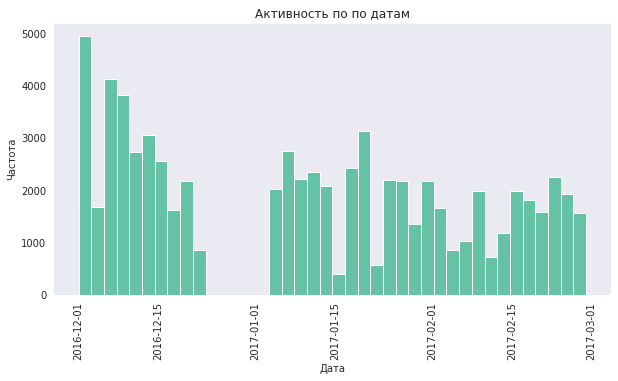

In [28]:
plt.figure(figsize =(10, 5))
sns.set_style('darkgrid')
sns.set_palette('Set2')
data['date'].hist(
                bins=40
                )
plt.title('Активность по по датам')
plt.xlabel('Дата')
plt.xticks(rotation=90)
plt.ylabel('Частота')
plt.grid()
plt.show()

**Вывод**: Рассматриваемый период с 1 декабря 2016г. по 28 февраля 2017 г. Проверим, возможно часть магазинов открылись недавно, в этом случае нет смысла их оценивать за конкретный период. Так же видно, что в период с 23 декабря 2016 по 04 января 2017 продажи отсутствовали.

In [29]:
group_years =data.groupby('shop_id')['date'].min() #посмотрим когда была проведена первая покупка в каждом магазине.
display(group_years.sort_values())

shop_id
Shop 0    2016-12-01
Shop 1    2016-12-01
Shop 6    2016-12-01
Shop 5    2016-12-01
Shop 4    2016-12-01
Shop 3    2016-12-01
Shop 2    2016-12-01
Shop 7    2016-12-03
Shop 8    2016-12-03
Shop 9    2016-12-03
Shop 10   2016-12-03
Shop 11   2016-12-03
Shop 12   2016-12-03
Shop 13   2016-12-05
Shop 14   2016-12-05
Shop 15   2016-12-07
Shop 16   2016-12-09
Shop 17   2016-12-09
Shop 18   2016-12-14
Shop 19   2016-12-14
Shop 20   2016-12-15
Shop 21   2016-12-15
Shop 22   2016-12-16
Shop 23   2016-12-20
Shop 25   2017-01-24
Shop 24   2017-01-24
Shop 26   2017-01-25
Shop 27   2017-01-27
Shop 28   2017-02-14
Shop 29   2017-02-24
Shop 30   2017-02-28
Name: date, dtype: datetime64[ns]

**Вывод**: Есть ряд магазинов в которых первая продажа была осуществлена в феврале 2017 года. Будем считать, что это магазины, которые недавно открылись.Это магазины Shop 28, Shop 29, Shop 30. 

In [30]:
#data_without_shop = data_without_shop_null[data_without_shop_null['date']<'2017-02-01']
#data_without_shop = data_without_shop_null.query('shop_id != ["Shop 28", "Shop 29", "Shop 30"]')
#display (data_without_shop['shop_id'].value_counts())

### Оценим эффективность всех магазинов посчитав их выручку.

In [31]:
store_revenue  = data.pivot_table(index='shop_id', values='revenue', aggfunc='sum')
display(store_revenue.sort_values(by='revenue', ascending=False) )

,revenue
shop_id,
Shop 0,1605228.375
Shop 3,101963.465
Shop 6,55877.765
Shop 4,50533.035
Shop 1,48030.905
Shop 2,39356.725
Shop 14,22153.325
Shop 8,16971.025
Shop 7,11233.930


<function matplotlib.pyplot.show(close=None, block=None)>

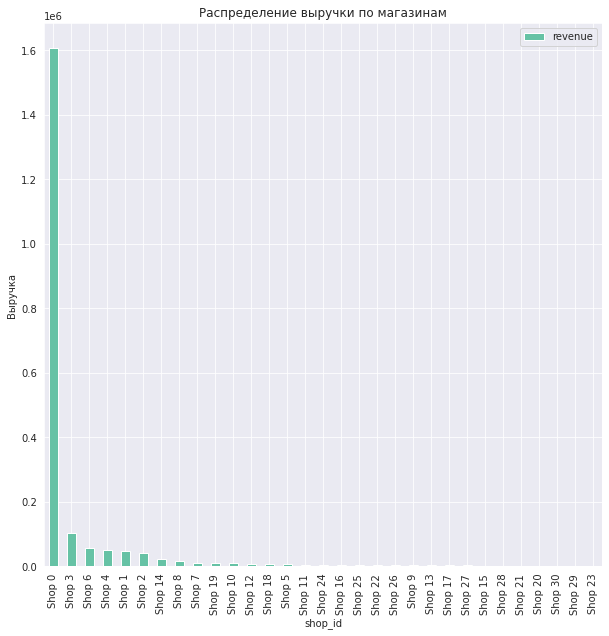

In [32]:
store_revenue.sort_values(by='revenue', ascending=False).plot(grid=True, kind='bar',figsize=(10, 10))
plt.title("Распределение выручки по магазинам")

plt.ylabel("Выручка")
plt.show

**Вывод**: Как мы видим, по выручки с большим отрывом идет Shop 0 (1963997). Будем считать, что это Флагманский магазин или головной склад, а остальные магазины это региональный ритейл. Кроме того видим, что в магазине Shop 23 есть только возвраты (отрицательное значение по выручке). Думаю нужно исключить. 

Оценим эффективность  магазинов по отдельности. Shop 0 и все остальные.

In [33]:
data_with_shop_null=data.query('shop_id == ["Shop 0"]') # Только магин ноль
data_without_shop_null=data.query('shop_id != ["Shop 0", "Shop 23","Shop 28", "Shop 29", "Shop 30" ]') #Все магазины без нулевого. 
data_without_shop_null_revenue  = data_without_shop_null.pivot_table(index='shop_id', values='revenue', aggfunc='sum')

#display(data_with_shop_null) 

<function matplotlib.pyplot.show(close=None, block=None)>

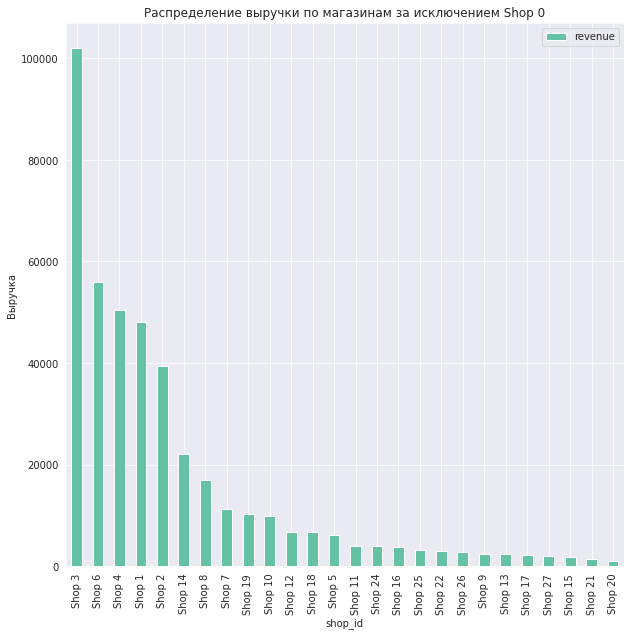

In [34]:
data_without_shop_null_revenue.sort_values(by='revenue', ascending=False).plot(grid=True, kind='bar',figsize=(10, 10))
plt.title("Распределение выручки по магазинам за исключением Shop 0")

plt.ylabel("Выручка")
plt.show

**Вывод**: Наибольшую выручку (после Shop 0) имеют магазины Shop3(102070), Shop 6(62409), Shop 4(53748), Shop 1(48615), Shop 2(39523).

### Посчитаем кол-во уникальных продаж  по магазинам.

In [35]:
data_q = data.pivot_table(index=['shop_id'], values=["purchase_id"],
                       aggfunc={"purchase_id":'nunique'},
                       fill_value=0)
display(data_q.sort_values(by='purchase_id', ascending=False))

,purchase_id
shop_id,
Shop 0,4311
Shop 4,113
Shop 1,89
Shop 6,46
Shop 12,21
Shop 8,20
Shop 2,19
Shop 10,15
Shop 3,15


In [36]:
data_q= data_q.query('shop_id != ["Shop 23","Shop 28", "Shop 29", "Shop 30" ]')

<function matplotlib.pyplot.show(close=None, block=None)>

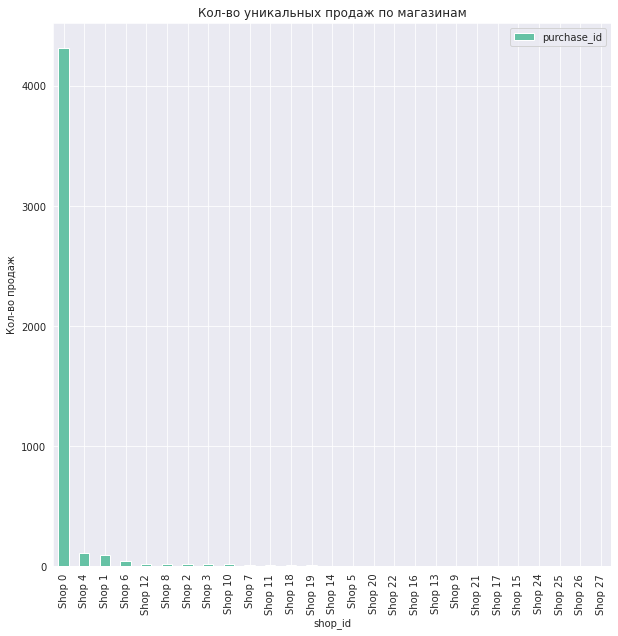

In [37]:
data_q.sort_values(by='purchase_id', ascending=False).plot(grid=True, kind='bar',figsize=(10, 10))
plt.title("Кол-во уникальных продаж по магазинам")

plt.ylabel("Кол-во продаж")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

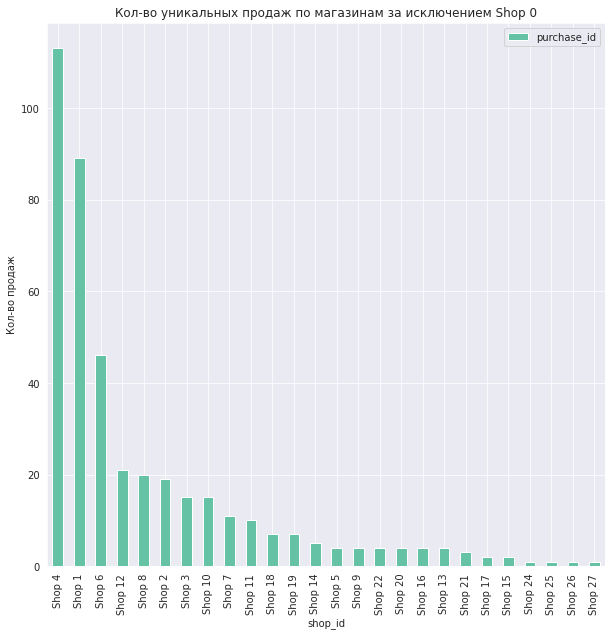

In [38]:
data_q = data_q.query('shop_id != ["Shop 0"]')
data_q.sort_values(by='purchase_id', ascending=False).plot(grid=True, kind='bar',figsize=(10, 10))
plt.title("Кол-во уникальных продаж по магазинам за исключением Shop 0")

plt.ylabel("Кол-во продаж")
plt.show

**Вывод**: Как и ожидалось, самое большое кол-во уникальных продаж в Shop 0(4311), далее Shop 4(113), Shop 1(89) Shop 6(46)
Shop 12(21).    
    

### Посчитаем средние чеки для Shop 0, и для остальных магазинов. 

Для того чтобы корректно рассчитать средний чек по магазинам избавимся от возвратов. Т.е. отметем все покупки кол-во которых имеет отрицательное кол-во. Начнем с магазина Shop 0.

####  Посчитаем средние чеки для Shop 0

In [39]:
data_with_shop_null= data_with_shop_null[data_with_shop_null['quantity']>=1]

data_with_shop_null_check =data_with_shop_null.pivot_table(index=['shop_id'], values=["purchase_id", "revenue"],
                       aggfunc={"purchase_id":'nunique', "revenue":'sum'},
                       fill_value=0)
display(data_with_shop_null_check)

,purchase_id,revenue
shop_id,,
Shop 0,3383,1963997.255


In [40]:
data_with_shop_null_check['mean_check']=data_with_shop_null_check['revenue']/data_with_shop_null_check['purchase_id']
display(round(data_with_shop_null_check,2))

,purchase_id,revenue,mean_check
shop_id,,,
Shop 0,3383,1963997.25,580.55


#### Посчитаем средние чеки  для остальных магазинов. 

In [41]:
data_without_shop= data_without_shop_null[data_without_shop_null['quantity']>=0]

data_without_shop_check =data_without_shop.pivot_table(index=['shop_id'], values=["purchase_id", "revenue"],
                       aggfunc={"purchase_id":'nunique', "revenue":'sum'},
                       fill_value=0)
#display(data_without_shop_check)

In [42]:
data_without_shop_check['mean_check']=(data_without_shop_check['revenue']/data_without_shop_check['purchase_id'])
data_without_shop_check= data_without_shop_check.reset_index().sort_values(by='mean_check', ascending=False)
display(round(data_without_shop_check,2))

,shop_id,purchase_id,revenue,mean_check
19,Shop 3,13,102070.05,7851.54
5,Shop 14,4,22346.05,5586.51
15,Shop 24,1,3984.63,3984.63
16,Shop 25,1,3234.27,3234.27
17,Shop 26,1,2775.59,2775.59
11,Shop 2,17,39523.42,2324.91
10,Shop 19,5,11299.83,2259.97
18,Shop 27,1,2095.47,2095.47
22,Shop 6,37,62409.14,1686.73
21,Shop 5,4,6202.61,1550.65


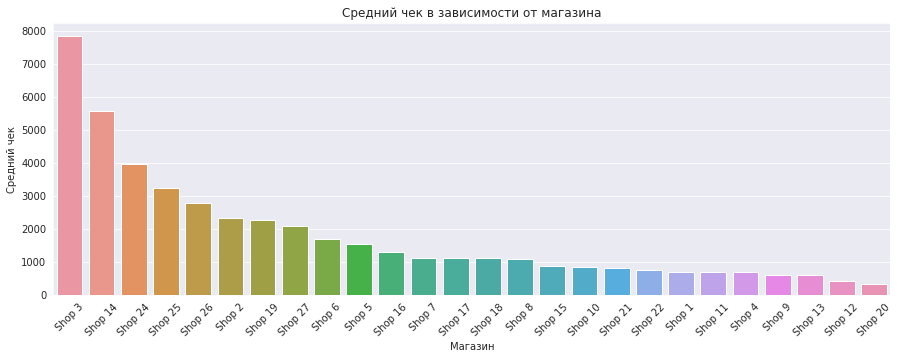

In [43]:
plt.figure(figsize=(15, 5))

ax = sns.barplot(x='shop_id', y='mean_check', data=data_without_shop_check)

ax.set_title('Средний чек в зависимости от магазина')
ax.set_xlabel('Магазин')
ax.set_ylabel('Средний чек')
plt.xticks(rotation=45)
plt.show()

**Вывод**: Во первых мы видим, что Shop 0 при большой выручки имеет весьма скромный средний чек(580.55). Наибольшие средние чеки имеют магазины: Shop 3 (7851.54), Shop 14  (5586.51), Shop 24  (3984.63), Shop 25  (3234.27), Shop 26(2775.59)

## Оценим эффективность программы лояльности

### Определим в каких магазинах действует программа лояльности, т.е loyalty_program =1

In [44]:
data_with_shop_null_loyal = data_with_shop_null.query( 'loyalty_program ==1')

display(data_with_shop_null_loyal)


,purchase_id,item_id,quantity,purchase_date,customer_id,shop_id,loyalty_program,date,price_per_one,revenue
2,538855,21239,7,2016-12-14 13:50:00,22182.0,Shop 0,1,2016-12-14,1.630,11.410
10,537795,82494L,5,2016-12-08 13:03:00,22892.0,Shop 0,1,2016-12-08,5.205,26.025
20,543808,21094,3,2017-02-13 13:22:00,23133.0,Shop 0,1,2017-02-13,1.240,3.720
31,543040,22550,1,2017-02-02 17:06:00,23016.0,Shop 0,1,2017-02-02,3.750,3.750
35,537077,72598,3,2016-12-05 11:59:00,22741.0,Shop 0,1,2016-12-05,1.630,4.890
...,...,...,...,...,...,...,...,...,...,...
104259,538354,48138,5,2016-12-10 15:45:00,22552.0,Shop 0,1,2016-12-10,14.280,71.400
104275,538370,22314,1,2016-12-12 11:06:00,22602.0,Shop 0,1,2016-12-12,5.790,5.790
104277,543815,21123,1,2017-02-13 15:18:00,22934.0,Shop 0,1,2017-02-13,2.460,2.460
104280,536790,82494L,5,2016-12-02 15:26:00,23529.0,Shop 0,1,2016-12-02,5.205,26.025


In [45]:
test1 =data_with_shop_null_loyal.groupby('shop_id')['loyalty_program'].count()
display(test1)

shop_id
Shop 0    17276
Name: loyalty_program, dtype: int64

In [46]:
data_without_shop_null_loyal = data_without_shop_null.query( 'loyalty_program ==1')

display(data_without_shop_null_loyal)

,purchase_id,item_id,quantity,purchase_date,customer_id,shop_id,loyalty_program,date,price_per_one,revenue
3957,541576,22896,1,2017-01-19 13:32:00,22776.0,Shop 8,1,2017-01-19,4.960,4.960
4313,542428,21260,47,2017-01-28 10:00:00,23083.0,Shop 19,1,2017-01-28,3.250,152.750
4339,538095,22909,1,2016-12-09 14:55:00,22776.0,Shop 8,1,2016-12-09,1.240,1.240
5609,538095,22500,1,2016-12-09 14:55:00,22776.0,Shop 8,1,2016-12-09,10.790,10.790
6529,539338,21212,239,2016-12-17 10:54:00,23083.0,Shop 19,1,2016-12-17,1.250,298.750
...,...,...,...,...,...,...,...,...,...,...
97884,542428,22721,23,2017-01-28 10:00:00,23083.0,Shop 19,1,2017-01-28,7.870,181.010
98801,538095,22572,2,2016-12-09 14:55:00,22776.0,Shop 8,1,2016-12-09,1.240,2.480
99467,541576,21279,1,2017-01-19 13:32:00,22776.0,Shop 8,1,2017-01-19,4.960,4.960
103970,541576,22897,1,2017-01-19 13:32:00,22776.0,Shop 8,1,2017-01-19,2.185,2.185


In [47]:
test1 =data_without_shop_null_loyal.groupby('shop_id')['loyalty_program'].count().reset_index(drop=False)
display(test1)

,shop_id,loyalty_program
0,Shop 19,48
1,Shop 8,34


**Вывод** Мы видим, что программа лояльности применяются только в некоторых магазинах. Это Shop 0, Shop 19, Shop 28, Shop 8. Shop 0 Это магазин с наибольшими продажами. Все остальные магазины как мы видели раньше, имеют не самые высокие показатели по выручки. Но так же мы видели что например магазин Shop 19 имеет хорошие показатели среднего чека. и 28 магазин мы вообще решили отмести т.к. он только открылся.

### Какие поведения характерны для пользователей программы лояльности

#### Посмотрим какое кол-во покупок характерно для пользователей программы лояльности в сравнении с покупателями, которые этой программой не пользуются.

In [48]:
client_count_null =data_with_shop_null.pivot_table(index=['shop_id', 'loyalty_program'], values='purchase_id', aggfunc='nunique')
display(client_count_null)

purchase_id
shop_id loyalty_program             
Shop 0  0                       2269
        1                       1114

In [49]:
data_shop = data_without_shop_null.query('shop_id == ["Shop 19", "Shop 8"]')

client_count_shops =data_shop.pivot_table(index=['shop_id', 'loyalty_program'], values='purchase_id', aggfunc='nunique')
display(client_count_shops)

purchase_id
shop_id loyalty_program             
Shop 19 0                          3
        1                          4
Shop 8  0                         18
        1                          2

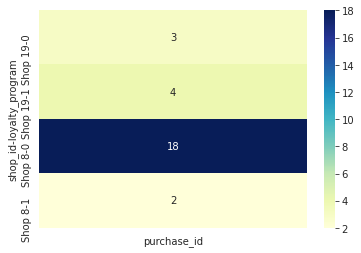

In [50]:
ax = sns.heatmap(client_count_shops, annot=True, cmap="YlGnBu")
plt.show()

**Вывод**: В целом мы видим, что кол-во покупок совершается покупателями без программы лояльности. Но в магазине Shop 19, картина выглядит лучше. Там по программе лояльности сделали больше покупок, чем без нее.
    
    

#### Посмотрим выручку магазинов в зависимости от программы лояльности или ее отсутствии.

In [51]:
client_count_null =data_with_shop_null.pivot_table(index=['shop_id', 'loyalty_program'], values='revenue', aggfunc='sum')
display(client_count_null)

revenue
shop_id loyalty_program             
Shop 0  0                1384479.240
        1                 579518.015

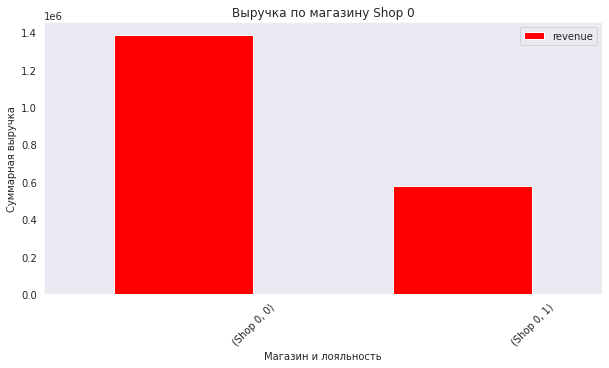

In [52]:
ax=client_count_null.plot(kind='bar',color='red', figsize=(10,5), grid=True, position=1 )
plt.title('Выручка по магазину Shop 0')
plt.xlabel('Магазин и лояльность')
plt.xticks(rotation=45)
plt.ylabel('Суммарная выручка')
plt.grid()
plt.show()

In [53]:

client_count_shop =data_shop.pivot_table(index=['shop_id', 'loyalty_program'], values='revenue', aggfunc='sum')
display(client_count_shop)

revenue
shop_id loyalty_program           
Shop 19 0                 1248.135
        1                 9001.465
Shop 8  0                16715.970
        1                  255.055

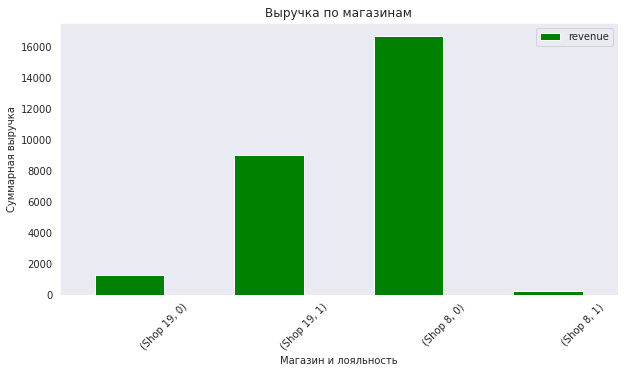

In [54]:
client_count_shop.plot(kind='bar',color='green', figsize=(10,5), grid=True, position=1 )

#client_count_shop.query('shop_id == ["Shop 8"]').plot(kind='bar', color='green', figsize=(10,5), grid=True,ax=ax,position=1)
plt.title('Выручка по магазинам')
plt.xlabel('Магазин и лояльность')
plt.xticks(rotation=45)
plt.ylabel('Суммарная выручка')
plt.grid()
plt.show()

**Вывод**: Выручка опять же больше у покупателей без программы лояльности. При этом магазин Shop 19 показывает хорошие результаты по программе лояльности.

#### Посмотрим средний чек магазинов в зависимости от программы лояльности или ее отсутствие.

Посмотрим средний чек для Shop 0 в зависимости от программы лояльности или ее отсутствие. В среднем чек будем учитывать только покупки. Возвраты учитывать не будем.

In [55]:
data_with_shop_null= data_with_shop_null[data_with_shop_null['quantity']>=1] 
# Кол-во покупок больше либо равно 1, т.е мы отметаем возвраты

data_with_shop_null_check1 =data_with_shop_null.pivot_table(index=['shop_id','loyalty_program'], values=["purchase_id", "revenue"],
                       aggfunc={"purchase_id":'nunique', "revenue":'sum'},
                       fill_value=0)
display(data_with_shop_null_check1)

purchase_id      revenue
shop_id loyalty_program                          
Shop 0  0                       2269  1384479.240
        1                       1114   579518.015

In [56]:
data_with_shop_null_check1['mean_check']=data_with_shop_null_check1['revenue']/data_with_shop_null_check1['purchase_id']
display(round(data_with_shop_null_check1,2))

purchase_id     revenue  mean_check
shop_id loyalty_program                                     
Shop 0  0                       2269  1384479.24      610.17
        1                       1114   579518.01      520.21

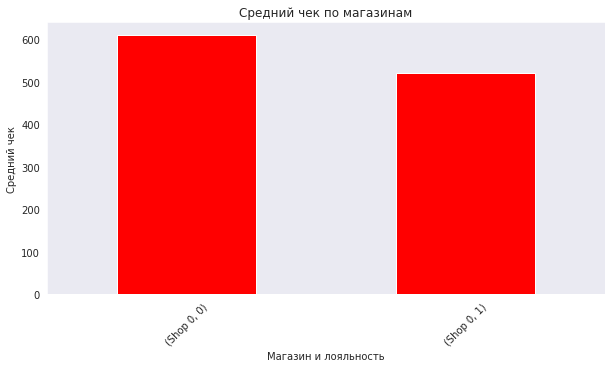

In [57]:
data_with_shop_null_check1['mean_check'].plot(kind='bar', color='red', figsize=(10,5), grid=True, position=0.5)

plt.title('Средний чек по магазинам')
plt.xlabel('Магазин и лояльность')
plt.xticks(rotation=45)
plt.ylabel('Средний чек')
plt.grid()
plt.show()

In [58]:
data_shop= data_shop[data_shop['quantity']>=1]

data_without_shop_check1 =data_shop.pivot_table(index=['shop_id','loyalty_program'], values=["purchase_id", "revenue"],
                       aggfunc={"purchase_id":'nunique', "revenue":'sum'},
                       fill_value=0)
#display(data_without_shop_check)

In [59]:
data_without_shop_check1['mean_check']=(data_without_shop_check1['revenue']/data_without_shop_check1['purchase_id'])
#data_without_shop_check1= data_without_shop_check1.sort_values(by='mean_check', ascending=False)
display(round(data_without_shop_check1,2))

purchase_id   revenue  mean_check
shop_id loyalty_program                                   
Shop 19 0                          2   1274.11      637.06
        1                          3  10025.71     3341.90
Shop 8  0                         14  16933.19     1209.51
        1                          2    255.05      127.53

In [60]:
##data_without_shop_check1_1=data_without_shop_check1[['loyalty_program','mean_check']]
##data_without_shop_check1_1

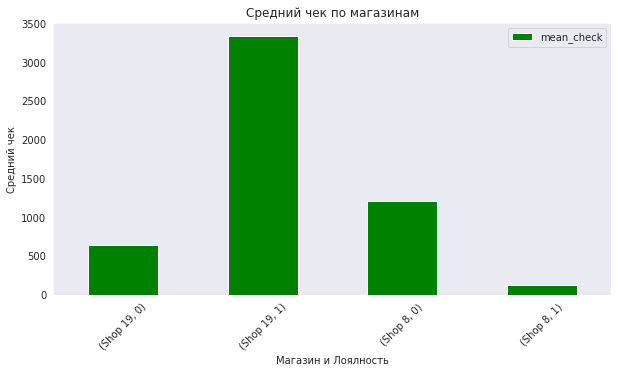

In [61]:
data_without_shop_check1.plot(kind='bar',y = ['mean_check'], color='green', figsize=(10,5), grid=True, position=0.5)
plt.title('Средний чек по магазинам')
plt.xlabel('Магазин и Лоялность')
plt.xticks(rotation=45)
plt.ylabel('Средний чек')
plt.grid()
plt.show()

**Вывод** Средний чек клиентов участвующих в программе лояльности в магазине Shop 19 гораздо больше чем у тех, кто не участвует в этой программе. Хороший знак.В Shop 8 и Shop 0 средний чек выше в магазинах у клиентов не участвующих в программе лояльности.

## Статистический анализ данных 

### Проверем статистическую гипотезу, что средний чек пользователей программы лояльности и пользователей без нее, равны.

Сформулируем гипотезы

Считаем нулевую гипотезу, что средний чек от покупатель с программой лоялности и без программы лояльности равны. 

Альтернативная теория, что средние чеки не равны.

In [62]:
display (data)

,purchase_id,item_id,quantity,purchase_date,customer_id,shop_id,loyalty_program,date,price_per_one,revenue
0,538280,21873,11,2016-12-10 12:50:00,18427.0,Shop 0,0,2016-12-10,1.630,17.930
2,538855,21239,7,2016-12-14 13:50:00,22182.0,Shop 0,1,2016-12-14,1.630,11.410
7,541424,79321,1,2017-01-17 17:57:00,NaN,Shop 0,0,2017-01-17,5.750,5.750
10,537795,82494L,5,2016-12-08 13:03:00,22892.0,Shop 0,1,2016-12-08,5.205,26.025
11,541696,22197,4,2017-01-20 18:08:00,NaN,Shop 0,0,2017-01-20,1.240,4.960
...,...,...,...,...,...,...,...,...,...,...
104296,540154,22134,3,2017-01-05 11:30:00,NaN,Shop 0,0,2017-01-05,0.630,1.890
104297,538566,21826,1,2016-12-13 11:21:00,NaN,Shop 0,0,2016-12-13,2.460,2.460
104299,538068,85048,1,2016-12-09 14:05:00,23657.0,Shop 0,1,2016-12-09,8.330,8.330
104300,538207,22818,11,2016-12-10 11:33:00,18427.0,Shop 0,0,2016-12-10,0.830,9.130


In [63]:
data= data[data['quantity']>=0]

data_check= data.pivot_table(index=['shop_id','loyalty_program'], values=["purchase_id", "revenue"],
                       aggfunc={"purchase_id":'nunique', "revenue":'sum'},
                       fill_value=0).reset_index()
data_check['mean_check']=(data_check['revenue']/data_check['purchase_id'])

data_check=data_check.query('shop_id == ["Shop 19", "Shop 8", "Shop 0" ]')
display(data_check)

,shop_id,loyalty_program,purchase_id,revenue,mean_check
0,Shop 0,0,2269,1384479.240,610.171547
1,Shop 0,1,1114,579518.015,520.213658
12,Shop 19,0,2,1274.115,637.057500
13,Shop 19,1,3,10025.715,3341.905000
31,Shop 8,0,14,16933.190,1209.513571
32,Shop 8,1,2,255.055,127.527500


In [64]:
mean_check_loyal_null= data_check[data_check['loyalty_program']==0]
mean_check_loyal_one= data_check[data_check['loyalty_program']==1]

mean_check_loyal_null['mean_check']

0      610.171547
12     637.057500
31    1209.513571
Name: mean_check, dtype: float64

In [65]:
mean_check_loyal_one['mean_check']

1      520.213658
13    3341.905000
32     127.527500
Name: mean_check, dtype: float64

In [66]:
alpha = .05 # критический уровень статистической значимости

In [67]:
results=st.ttest_ind(mean_check_loyal_null['mean_check'], mean_check_loyal_one['mean_check'],equal_var=False ) 
alpha = .05 # критический уровень статистической значимости
results.pvalue

if (results.pvalue<alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось  отвергнуть нулевую гипотезу')


Не получилось  отвергнуть нулевую гипотезу


**Вывод**: Неудалось опровергнуть нулевую теорию о том, что что средний чек от покупатель с программой лоялности и без программы лояльности равны.

### Проверим гипотезу, что  выручка в рабочий день и выручка в выходной день одинаковые.

Я обратил внимание, что с 23 декабря 2016 по 04 января 2017 продажи отсутствовали. Думаю это связанно с рождественскими праздниками. Думаю если бы некоторые наши магазина работали вы выходные дни мы могли бы увеличить выручку. Но для начала предлагаю проверить гипотезу,что выручка в рабочие дни и выручка в выходные дни равны.

Алтернативная теория, что выручки не равны.

Посчитаем диссперию 

In [68]:
data['day_of_week'] = data['date'].dt.day_name()
data

,purchase_id,item_id,quantity,purchase_date,customer_id,shop_id,loyalty_program,date,price_per_one,revenue,day_of_week
0,538280,21873,11,2016-12-10 12:50:00,18427.0,Shop 0,0,2016-12-10,1.630,17.930,Saturday
2,538855,21239,7,2016-12-14 13:50:00,22182.0,Shop 0,1,2016-12-14,1.630,11.410,Wednesday
7,541424,79321,1,2017-01-17 17:57:00,NaN,Shop 0,0,2017-01-17,5.750,5.750,Tuesday
10,537795,82494L,5,2016-12-08 13:03:00,22892.0,Shop 0,1,2016-12-08,5.205,26.025,Thursday
11,541696,22197,4,2017-01-20 18:08:00,NaN,Shop 0,0,2017-01-20,1.240,4.960,Friday
...,...,...,...,...,...,...,...,...,...,...,...
104296,540154,22134,3,2017-01-05 11:30:00,NaN,Shop 0,0,2017-01-05,0.630,1.890,Thursday
104297,538566,21826,1,2016-12-13 11:21:00,NaN,Shop 0,0,2016-12-13,2.460,2.460,Tuesday
104299,538068,85048,1,2016-12-09 14:05:00,23657.0,Shop 0,1,2016-12-09,8.330,8.330,Friday
104300,538207,22818,11,2016-12-10 11:33:00,18427.0,Shop 0,0,2016-12-10,0.830,9.130,Saturday


In [69]:
data['day_of_week'].unique()

array(['Saturday', 'Wednesday', 'Tuesday', 'Thursday', 'Friday', 'Monday'],
      dtype=object)

In [70]:
def day_of_week(day_of_week):  # создаем функция для определения рабочий это день или нет. 
    if day_of_week == 'Saturday':
        return 'выходной'
            
    return 'рабочий'
 
data['sort_day'] = data['day_of_week'].apply(day_of_week)
display(data)


,purchase_id,item_id,quantity,purchase_date,customer_id,shop_id,loyalty_program,date,price_per_one,revenue,day_of_week,sort_day
0,538280,21873,11,2016-12-10 12:50:00,18427.0,Shop 0,0,2016-12-10,1.630,17.930,Saturday,выходной
2,538855,21239,7,2016-12-14 13:50:00,22182.0,Shop 0,1,2016-12-14,1.630,11.410,Wednesday,рабочий
7,541424,79321,1,2017-01-17 17:57:00,NaN,Shop 0,0,2017-01-17,5.750,5.750,Tuesday,рабочий
10,537795,82494L,5,2016-12-08 13:03:00,22892.0,Shop 0,1,2016-12-08,5.205,26.025,Thursday,рабочий
11,541696,22197,4,2017-01-20 18:08:00,NaN,Shop 0,0,2017-01-20,1.240,4.960,Friday,рабочий
...,...,...,...,...,...,...,...,...,...,...,...,...
104296,540154,22134,3,2017-01-05 11:30:00,NaN,Shop 0,0,2017-01-05,0.630,1.890,Thursday,рабочий
104297,538566,21826,1,2016-12-13 11:21:00,NaN,Shop 0,0,2016-12-13,2.460,2.460,Tuesday,рабочий
104299,538068,85048,1,2016-12-09 14:05:00,23657.0,Shop 0,1,2016-12-09,8.330,8.330,Friday,рабочий
104300,538207,22818,11,2016-12-10 11:33:00,18427.0,Shop 0,0,2016-12-10,0.830,9.130,Saturday,выходной


In [71]:
holiday = data[data['sort_day']=='выходной']
workday = data[data['sort_day']=='рабочий']

Посчитаем диссперию 

Считаем нулевую гипотизу, что выручка в будние дни и выходные неотличается.

Алтернативная теория, что выручка будет отличаться

In [72]:
results=st.ttest_ind(holiday['revenue'], workday['revenue'],equal_var=False ) 
alpha = .05 # критический уровень статистической значимости
results.pvalue

if (results.pvalue<alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилость отвергнуть нулевую гипотезу')

Не получилость отвергнуть нулевую гипотезу


Вывод: Нулевая теория не отвернута. Есть смысл попробывать некотрые магазины перевести на большее кол-во рабочих дней. Например открывть в воскрсенье. Возможно есть смысл так же открываь магазины и в праздничные дни.  Отделу управлению кадрами есть смысл проработать возможность вывода людей на работу.

## Общий вывод

Мы провели анализ эффективности сети строительных х материалов «Строили, строили и наконец построили» за период с 1 декабря 2016г. по 28 февраля 2017 г.

В ходе исследования мы выяснили, что наибольшее кол-во выручки нам приносит магазин Shop 0. Это либо Флагманский магазин, либо склад , который имеет возможность  самому продавать товары(как через кассу так и через онлайн сервисы.). Остальные магазины это более мелкие ритейл точки.

Кроме того мы обратили внимание, что ряд магазинов не подходят для дальнейшего исследования. Так  это магазин Shop 23 (одни отрицательные значения, т.е возвраты). А так же это магазины Shop 28, Shop 29, Shop 30 которые открылись только в феврале 2017 г. 

И так магазин Shop 0  приносит выручку 1 963 997. 
Далее Shop3(102070), Shop 6(62409), Shop 4(53748), Shop 1(48615), Shop 2.(39523)

Ввиду такой колоссальной разницы было принято решение рассматривать Shop 0 и все остальные отдельно друг от друга.

В ходе рассмотрения эффективности магазинов мы выявили, что Shop 0 имеет (за рассматриваемый период )  4311 уникальных чека (уникальной покупки), далее идут  Shop 4(113), Shop 1(89) Shop 6(46) Shop 12(21). Как видим разница существенная.

При этом после подсчета среднего чека (до этого мы решили, что мы считаем только покупки у которых кол-во товара больше 1, т.е. возвраты мы не рассматриваем ) мы видим, что  Shop 0 весьма скромный средний чек, всего 580.55 .
Далее Shop 3 (7851.54), Shop 14  (5586.51), Shop 24  (3984.63), Shop 25  (3234.27), Shop 26(2775.59). 

Т.е по эффективности мы можем рекомендовать Shop 0 стараться увеличивать сумму чека, т.к кол-во чеков там большое и выручка существенная.  Возможно это будут какие -нибудь сопутствующие товары, возможно строительные наборы или программа лояльности. (Эффективность которой мы рассмотрели). Если это физический магазин хорошо прописать скрипты продавцам по сопутствующим товарам. Так же хочется отметить магазин Shop3, хороший средний чек, приличная выручка. Необходимо только увеличить кол-во продаж. 

Оцениваю эффективность программы лояльности, мы обнаружили, что она действует всего в 4 х магазинах. Это магазин Shop 0, а так же Shop 19,  Shop 28 ,  Shop 8. При этом как мы решили до этого, Shop 28 мы рассматривать не будет(т.к он стал работать недавно).

Кол-во  чеков по программы лояльности Shop 0 равно 1114, для Shop 19  равно 4 , для Shop 8 равно 2.
Выручка по программе лояльности Shop 0 равна 579518.01,  для Shop 19  равно 9001.465 , для Shop 8 равно 255.055

При этом средний чек  Shop 0 равна 520.21,  для Shop 19  равно 3341.90, для Shop 8 равно 127.53
Для магазина Shop 19 это хороший показатель по среднему чеку, несмотря на небольшое кол-во продаж. Нашим маркетологам есть смыл рассмотреть товары которые так хорошо покупаются вместе по программе лояльности и применить их в других магазинах.

Для того, чтобы оценить эффективность нашей компании по лояльности клиентов мы выдвинули гипотезу что средний чек от покупатель с программой лояльности и без программы лояльности равны и подтвердили ее.

Так же мы выдвинули гипотезу, что выручка в рабочие дни и выходные равны и так же подтвердили ее. Думаю есть смысл руководству опробовать эту гипотезу и открыть ряд магазинов в воскресение или в праздничные дни